In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [34]:
df= pd.read_csv('diabetes_medication_clinical_trial1_3.csv')
df.head()
df['hba1c difference'] =  df['hba1c'] - df['initial_hba1c']
female_df=df[df['gender']=='Female']
male_df=df[df['gender']=='Male']

,subject_id,group,age,gender,duration_diabetes,initial_hba1c,hba1c,time,adverse_event
0,1,treatment,70,Female,10,8.7,8.7,0,NaN
1,2,placebo,46,Male,19,9.9,9.9,0,Fatigue
2,3,treatment,56,Male,17,8.6,8.6,0,NaN
3,4,treatment,59,Male,19,8.9,8.9,0,Headache
4,5,treatment,68,Male,5,9.1,9.1,0,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subject_id         1400 non-null   int64  
 1   group              1400 non-null   object 
 2   age                1400 non-null   int64  
 3   gender             1400 non-null   object 
 4   duration_diabetes  1400 non-null   int64  
 5   initial_hba1c      1400 non-null   float64
 6   hba1c              1400 non-null   float64
 7   time               1400 non-null   int64  
 8   adverse_event      277 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 98.6+ KB


In [36]:
df.describe()

,subject_id,age,duration_diabetes,initial_hba1c,hba1c,time
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,100.500000,55.250000,10.450000,8.465500,7.686029,12.000000
std,57.754936,9.530602,5.805306,0.869367,1.106412,8.002859
min,1.000000,40.000000,1.000000,7.000000,4.700000,0.000000
25%,50.750000,46.000000,5.000000,7.700000,6.980000,4.000000
50%,100.500000,56.000000,11.000000,8.450000,7.700000,12.000000
75%,150.250000,64.000000,16.000000,9.125000,8.500000,20.000000
max,200.000000,70.000000,20.000000,10.000000,10.000000,24.000000


In [37]:
df.isnull().sum()

subject_id              0
group                   0
age                     0
gender                  0
duration_diabetes       0
initial_hba1c           0
hba1c                   0
time                    0
adverse_event        1123
dtype: int64

In [38]:
df['adverse_event'].value_counts()

adverse_event
Fatigue      74
Nausea       71
Headache     68
Dizziness    64
Name: count, dtype: int64

In [39]:
df['adverse_event'] = df['adverse_event'].fillna('None')

In [40]:
df['time'].value_counts()

time
0     200
4     200
8     200
12    200
16    200
20    200
24    200
Name: count, dtype: int64

In [41]:
df['group'].value_counts()

group
treatment    700
placebo      700
Name: count, dtype: int64

In [42]:
df['gender'].value_counts()

gender
Female    763
Male      637
Name: count, dtype: int64

In [97]:
#compare treatment vs placebo, by comparing hba1c before and after



In [102]:
time_intervals=df.groupby('group')[['time','hba1c difference']].value_counts().sort_values(by=['group','time'],ascending=[False,False])
time_intervals

TypeError: Series.sort_values() got an unexpected keyword argument 'by'

In [103]:
df.head()

,subject_id,group,age,gender,duration_diabetes,initial_hba1c,hba1c,time,adverse_event,hba1c difference
0,1,treatment,70,Female,10,8.7,8.7,0,None,0.0
1,2,placebo,46,Male,19,9.9,9.9,0,Fatigue,0.0
2,3,treatment,56,Male,17,8.6,8.6,0,None,0.0
3,4,treatment,59,Male,19,8.9,8.9,0,Headache,0.0
4,5,treatment,68,Male,5,9.1,9.1,0,None,0.0


In [104]:
#average hba1c reading placebo vs treatment

mean=df.groupby(['group','gender'])[['initial_hba1c','hba1c']].mean()
mean

initial_hba1c     hba1c
group     gender                         
placebo   Female       8.420833  8.061607
          Male         8.378846  8.020165
treatment Female       8.468852  7.268852
          Male         8.630769  7.430769

In [105]:
#average change placebo vs treatment

difference = df.groupby(['time','group'])['hba1c difference'].mean().unstack()
difference

group,placebo,treatment
time,,
0,0.0000,0.0
4,-0.1200,-0.4
8,-0.2400,-0.8
12,-0.3600,-1.2
16,-0.4800,-1.6
20,-0.5990,-2.0
24,-0.7136,-2.4


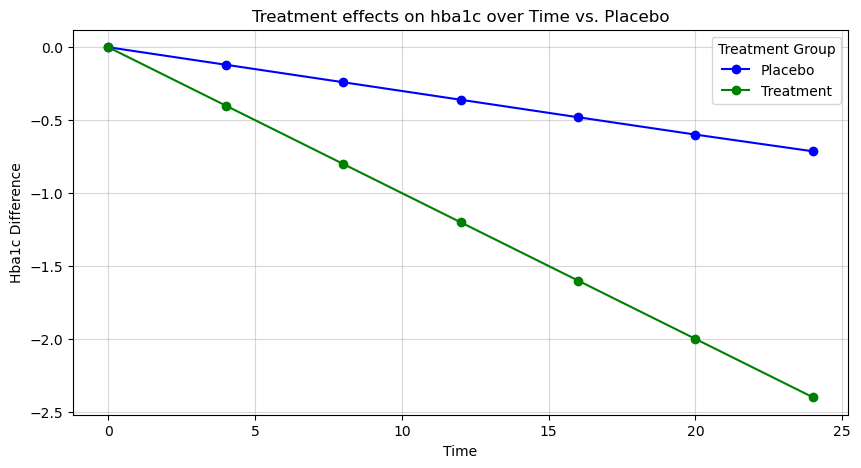

In [106]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(difference.index,difference['placebo'].values,color='blue',marker='o',label ='Placebo')
ax.plot(difference.index,difference['treatment'].values,color='green',marker='o',label ='Treatment')
ax.set_title('Treatment effects on hba1c over Time vs. Placebo')
ax.set_xlabel('Time')
ax.set_ylabel('Hba1c Difference')
ax.legend(title='Treatment Group')
ax.grid(alpha=0.5)
plt.show()

In [107]:
female_df=df[df['gender']=='Female']
male_df=df[df['gender']=='Male']

In [108]:
female_difference = female_df.groupby(['time','group'])['hba1c difference'].mean().unstack()
male_difference = male_df.groupby(['time','group'])['hba1c difference'].mean().unstack()

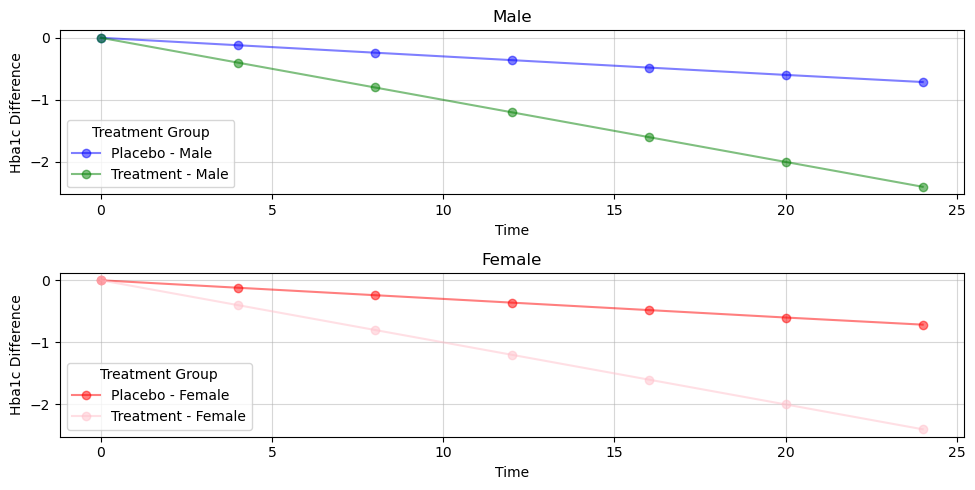

In [117]:
fig,ax=plt.subplots(2,1,figsize=(10,5))
ax[0].plot(male_difference.index,male_difference['placebo'].values,color='blue',marker='o',label ='Placebo - Male',alpha=0.5)
ax[0].plot(male_difference.index,male_difference['treatment'].values,color='green',marker='o',label ='Treatment - Male',alpha=0.5)
ax[1].plot(female_difference.index,female_difference['placebo'].values,color='red',marker='o',label ='Placebo - Female',alpha=0.5)
ax[1].plot(female_difference.index,female_difference['treatment'].values,color='pink',marker='o',label ='Treatment - Female',alpha=0.5)
ax[0].set_title('Male')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Hba1c Difference')
ax[1].set_title('Female')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Hba1c Difference')
ax[0].legend(title='Treatment Group')
ax[1].legend(title='Treatment Group')
ax[0].grid(alpha=0.5)
ax[1].grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [118]:
df

,subject_id,group,age,gender,duration_diabetes,initial_hba1c,hba1c,time,adverse_event,hba1c difference
0,1,treatment,70,Female,10,8.7,8.70,0,None,0.00
1,2,placebo,46,Male,19,9.9,9.90,0,Fatigue,0.00
2,3,treatment,56,Male,17,8.6,8.60,0,None,0.00
3,4,treatment,59,Male,19,8.9,8.90,0,Headache,0.00
4,5,treatment,68,Male,5,9.1,9.10,0,None,0.00
...,...,...,...,...,...,...,...,...,...,...
1395,196,placebo,47,Female,15,7.2,6.50,24,None,-0.70
1396,197,placebo,59,Female,16,8.6,7.88,24,None,-0.72
1397,198,placebo,69,Female,11,8.2,7.48,24,None,-0.72
1398,199,treatment,42,Male,5,9.9,7.50,24,None,-2.40


In [123]:
df[df['adverse_event']=='Fatigue']

,subject_id,group,age,gender,duration_diabetes,initial_hba1c,hba1c,time,adverse_event,hba1c difference
1,2,placebo,46,Male,19,9.9,9.90,0,Fatigue,0.00
20,21,placebo,67,Male,16,7.2,7.20,0,Fatigue,0.00
22,23,placebo,49,Female,5,10.0,10.00,0,Fatigue,0.00
43,44,placebo,40,Male,19,8.8,8.80,0,Fatigue,0.00
60,61,treatment,58,Male,5,7.7,7.70,0,Fatigue,0.00
...,...,...,...,...,...,...,...,...,...,...
1341,142,treatment,48,Female,15,9.4,7.00,24,Fatigue,-2.40
1346,147,treatment,47,Female,17,8.5,6.10,24,Fatigue,-2.40
1357,158,placebo,42,Male,5,7.3,6.58,24,Fatigue,-0.72
1374,175,placebo,66,Female,10,8.6,7.88,24,Fatigue,-0.72


In [125]:
x='9+7'
print(x)

9+7


In [126]:
x=9+7
y=71
print(x+y)

87


In [127]:
print('10+5')

10+5


In [128]:
date='1984'
print(date)

1984


In [132]:
from scipy import linalg
A=np.array([[2,1],[1,1]])
b=np.array([3,2])
x=linear.np(A,b)
x

NameError: name 'linear' is not defined